In [3]:
import pandas as pd
import numpy as np

In [4]:
df_forces_rod_bd = pd.read_excel('data_bases\Tablas_Sent60_BD.xlsx')
df_participante = pd.read_excel('data_bases\BASE DE DATOS-PARTICIPANTES.xlsx')
df_postura = pd.read_excel('data_bases\BASE DE DATOS-POSTURA.xlsx',header=1)
df_plates_forces = pd.read_excel('sentadilla_60.xlsx', sheet_name='SENT 60')

In [5]:
columns_f2=[names for names in df_plates_forces.columns if 'F2' in names]
columns_f2.append('participante')

In [6]:
df_plates = df_plates_forces[columns_f2]

In [7]:
df_1 = df_forces_rod_bd.rename(columns={"Sujeto": "participante"})
df_2 = df_participante.rename(columns={"#": "participante"})
df_3 = df_postura.rename(columns={"#": "participante"})



In [8]:
merged_df = pd.merge(df_1, df_2, on="participante", how="outer")  # Realiza un outer join
merged_df = pd.merge(merged_df, df_3, on="participante", how="outer")
merged_df = pd.merge(merged_df, df_plates, on="participante", how="outer")
#merged_df


In [9]:
merged_df.columns

Index(['participante', 'F2TIME_x', 'PESO', 'F2_RODSAGITALD', 'FcompresivasF',
       'FanteroposteiorF', 'FmedilateralesF', 'FcompresivasP',
       'FanteroposteiorP', 'FmedilateralesP', 'F2_1RODSAGITALI',
       'FcompresivasF_1', 'FanteroposteiorF_1', 'FmedilateralesF_1',
       'FcompresivasP_1', 'FanteroposteiorP_1', 'FmedilateralesP_1', 'NOMBRE ',
       'APELLIDO_x', 'FECHA DE NACIMIENTO', 'EDADES', 'PESO ', 'ALTURA', 'IMC',
       'DOMINANCIA', 'LONGITUD PIERNA DERECHA-REAL',
       'LONGITUD PIERNA IZQUIERDA-REAL', 'LONGITUD PIERNA DERECHA',
       'LONGITUD PIERNA IZQUIERDA', 'CIRCUNFERNCIA MUSLO DERECHO',
       'CIRCUNFERNCIA MUSLO IZQUIERDO', 'CIRCUNFERNCIA DE PIERNA DERECHA ',
       'CIRCUNFERENCIA DE PIERNA IZQUIERDA', 'NIVEL DE ACT FISICA',
       'ULTIMA MESTRUACIÓN', 'CICLO MESTRUAL', 'FECHA DE TOMA', 'NOMBRE',
       'APELLIDO_y', 'ROTT CAD I', 'ROTT CAD D', 'VARO RODILLA I',
       'VARO RODILLA D', 'VALGO RODILLA I', 'VALGO RODILLA D', 'RECURVATUM D',
       'RECUR

In [10]:
merged_df.to_excel('data_bases\merge_data.xlsx', index= False)

In [11]:
data_complete = pd.read_excel('data_bases\merge_data_filterd.xlsx')

#Fuerza en rodilla


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

'FcompresivasF',
'FanteroposteiorF', 'FmedilateralesF', 'FcompresivasP',
'FanteroposteiorP', 'FmedilateralesP', 'F2_1RODSAGITALI',
'FcompresivasF_1', 'FanteroposteiorF_1', 'FmedilateralesF_1',
'FcompresivasP_1', 'FanteroposteiorP_1', 'FmedilateralesP_1'

In [13]:
rod_forces = ['FcompresivasF',	'FanteroposteiorF','FmedilateralesF',	'FcompresivasP','FanteroposteiorP',	'FmedilateralesP',	'FcompresivasF_1',	'FanteroposteiorF_1', 'FmedilateralesF_1',	'FcompresivasP_1',	'FanteroposteiorP_1',	'FmedilateralesP_1']

In [14]:
data_complete[rod_forces].describe()

,FcompresivasF,FanteroposteiorF,FmedilateralesF,FcompresivasP,FanteroposteiorP,FmedilateralesP,FcompresivasF_1,FanteroposteiorF_1,FmedilateralesF_1,FcompresivasP_1,FanteroposteiorP_1,FmedilateralesP_1
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.493749,-1.509461,0.280584,-1.760249,-3.730063,-0.388566,3.485456,-1.077713,-0.260658,-1.353467,-2.886769,0.283385
std,1.257737,0.781873,0.202479,1.080709,1.638836,0.224197,1.141738,0.552038,0.265226,0.905057,1.505177,0.174035
min,2.508902,-3.815983,-0.076046,-4.459997,-7.529138,-0.993285,1.132642,-2.412756,-0.706150,-3.114500,-5.443213,0.009065
25%,3.740943,-1.563876,0.166935,-2.315082,-4.580745,-0.522911,2.672918,-1.404170,-0.459939,-2.028098,-3.719060,0.152421
50%,4.134944,-1.374034,0.291819,-1.626085,-3.605873,-0.335030,3.642715,-1.042809,-0.235183,-1.252572,-3.308660,0.305854
75%,5.329201,-1.068184,0.441121,-0.765505,-2.574921,-0.278696,4.100436,-0.677329,-0.090965,-0.658150,-1.883351,0.369025
max,7.474530,-0.613037,0.733233,-0.289353,-1.110834,-0.058570,5.449308,-0.170971,0.266840,-0.044351,-0.234631,0.662954


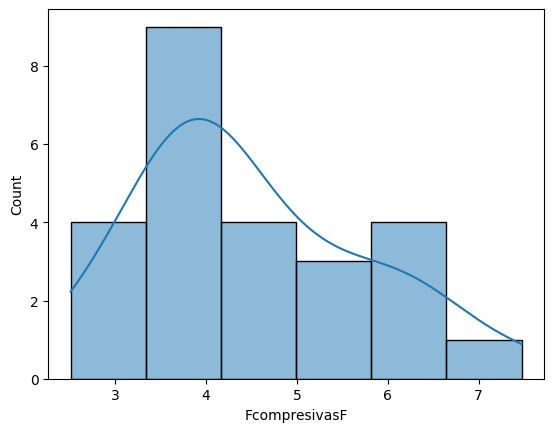

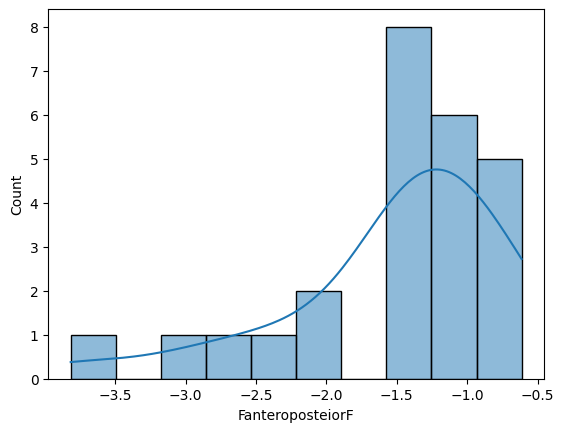

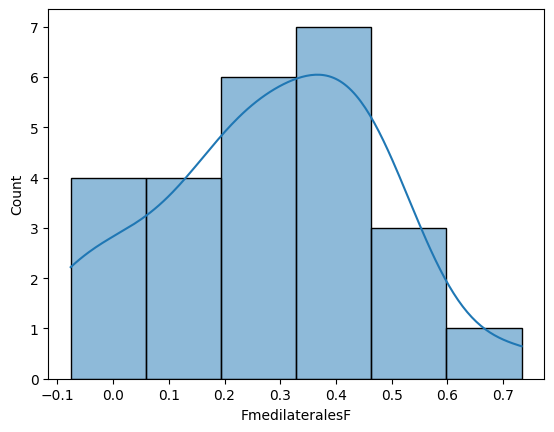

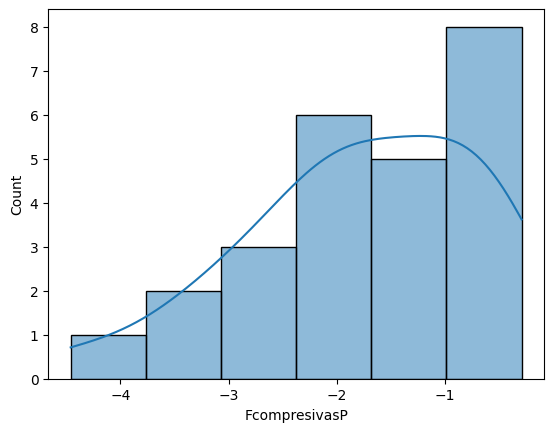

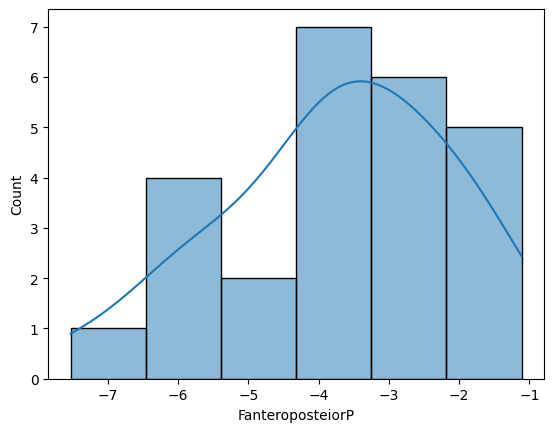

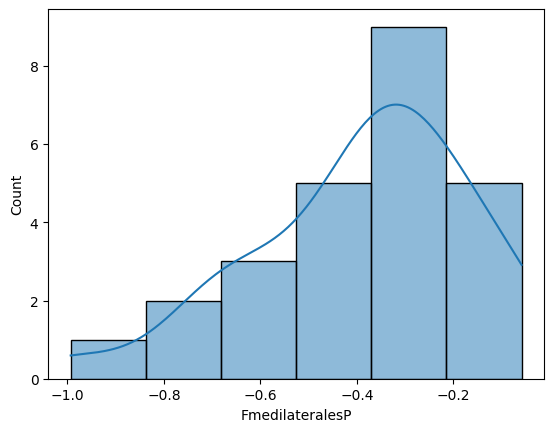

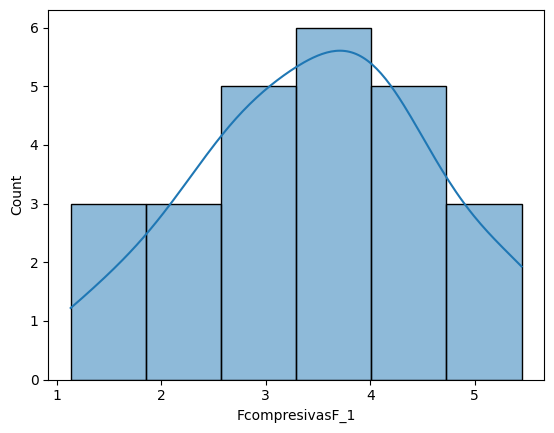

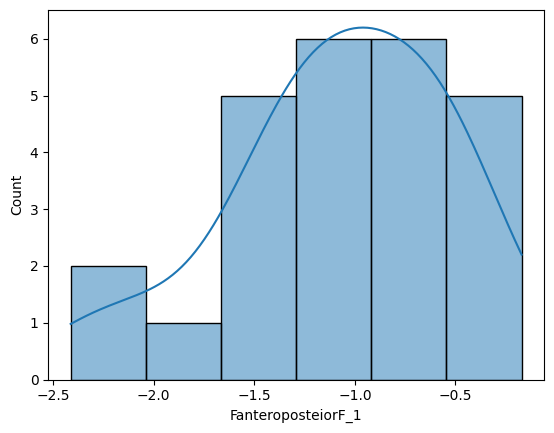

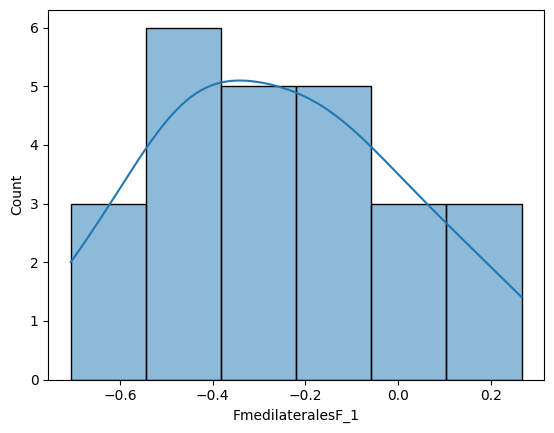

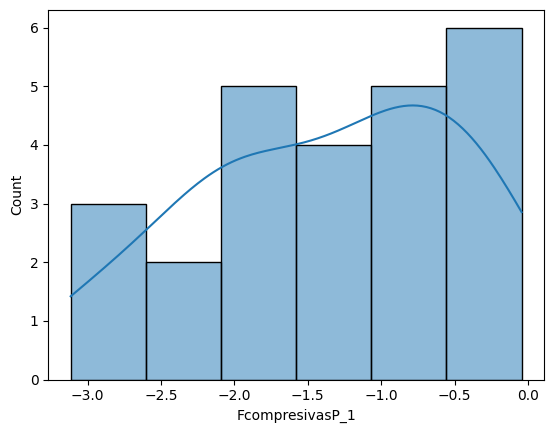

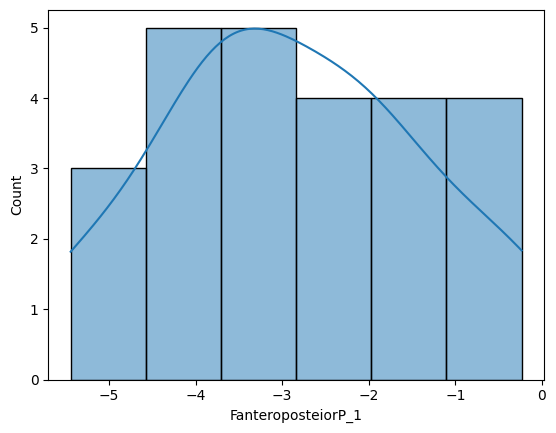

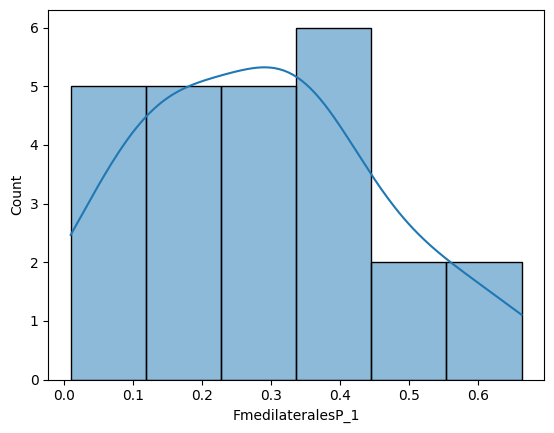

In [15]:
for force in rod_forces:
    sns.histplot(data_complete[force],kde=True )#sujeto
    plt.show()

In [16]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   participante                        25 non-null     int64         
 1   F2TIME_x                            25 non-null     float64       
 2   F2TIME_y                            25 non-null     float64       
 3   F2-RODSAGITAL D                     25 non-null     float64       
 4   F2-RODSAGITAL I                     25 non-null     float64       
 5   F2-VGRFY D (%BW)                    25 non-null     float64       
 6   F2-VGRFY I (%BW)                    25 non-null     float64       
 7   F2-VGRFX D (%BW)                    25 non-null     float64       
 8   F2-VGRFX I (%BW)                    25 non-null     float64       
 9   F2-VGRFZ D (%BW)                    25 non-null     float64       
 10  F2-VGRFZ I (%BW)            

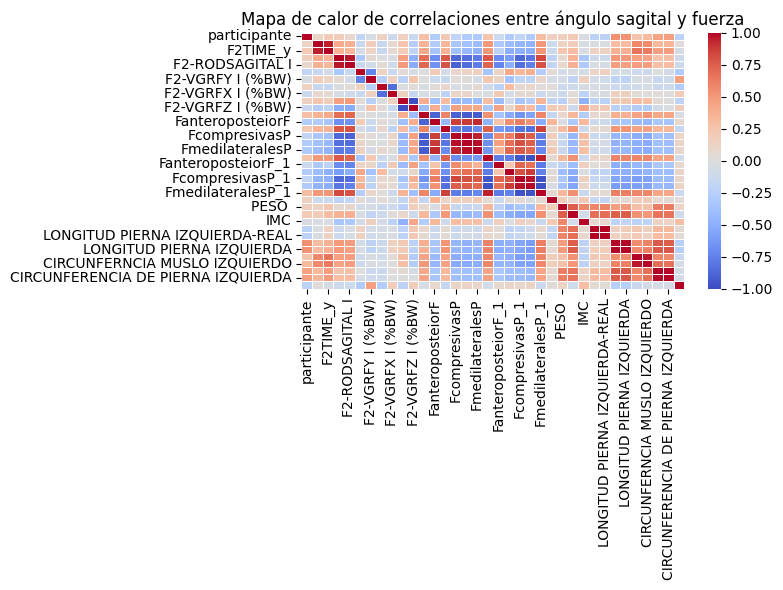

In [17]:
corr_matrix = data_complete.corr(numeric_only=True)

# Visualizar como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre ángulo sagital y fuerza")
plt.tight_layout()
plt.show()

In [18]:
corr_index = ['F2TIME_x', 'F2TIME_y', 'F2-RODSAGITAL D',
       'F2-RODSAGITAL I', 'F2-VGRFY D (%BW)', 'F2-VGRFY I (%BW)',
       'F2-VGRFX D (%BW)', 'F2-VGRFX I (%BW)', 'F2-VGRFZ D (%BW)',
       'F2-VGRFZ I (%BW)', 'EDADES', 'PESO ', 'ALTURA', 'IMC',
       'LONGITUD PIERNA DERECHA-REAL', 'LONGITUD PIERNA IZQUIERDA-REAL',
       'LONGITUD PIERNA DERECHA', 'LONGITUD PIERNA IZQUIERDA',
       'CIRCUNFERNCIA MUSLO DERECHO', 'CIRCUNFERNCIA MUSLO IZQUIERDO',
       'CIRCUNFERNCIA DE PIERNA DERECHA ',
       'CIRCUNFERENCIA DE PIERNA IZQUIERDA', 'CICLO MESTRUAL']

In [19]:
corr_index_2 = ['F2TIME_x', 'F2TIME_y', 'F2-RODSAGITAL D',
       'F2-RODSAGITAL I', 'EDADES', 'PESO ', 'ALTURA', 'IMC',
       'LONGITUD PIERNA DERECHA-REAL', 'LONGITUD PIERNA IZQUIERDA-REAL',
       'LONGITUD PIERNA DERECHA', 'LONGITUD PIERNA IZQUIERDA',
       'CIRCUNFERNCIA MUSLO DERECHO', 'CIRCUNFERNCIA MUSLO IZQUIERDO',
       'CIRCUNFERNCIA DE PIERNA DERECHA ',
       'CIRCUNFERENCIA DE PIERNA IZQUIERDA', 'CICLO MESTRUAL']

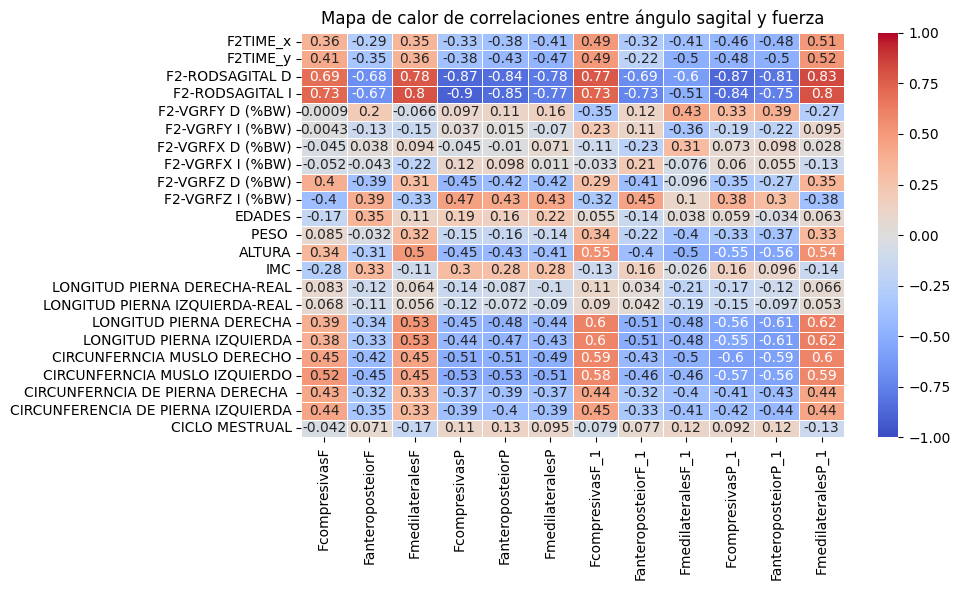

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[corr_index,rod_forces], annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre ángulo sagital y fuerza")
plt.tight_layout()
plt.show()

In [26]:
features = rod_forces + corr_index
df = data_complete[features]
df

,FcompresivasF,FanteroposteiorF,FmedilateralesF,FcompresivasP,FanteroposteiorP,FmedilateralesP,FcompresivasF_1,FanteroposteiorF_1,FmedilateralesF_1,FcompresivasP_1,...,IMC,LONGITUD PIERNA DERECHA-REAL,LONGITUD PIERNA IZQUIERDA-REAL,LONGITUD PIERNA DERECHA,LONGITUD PIERNA IZQUIERDA,CIRCUNFERNCIA MUSLO DERECHO,CIRCUNFERNCIA MUSLO IZQUIERDO,CIRCUNFERNCIA DE PIERNA DERECHA,CIRCUNFERENCIA DE PIERNA IZQUIERDA,CICLO MESTRUAL
0,4.827417,-1.515150,0.467731,-2.315082,-4.580745,-0.539680,4.357600,-1.042809,-0.614802,-2.261367,...,23.002962,81.5,81.5,88.5,89.0,47.5,47.5,35.5,35.5,28
1,2.508902,-0.644622,0.133381,-0.666371,-1.876029,-0.135499,2.394283,-0.429677,-0.160089,-0.658150,...,25.422222,86.5,86.5,78.5,79.0,42.0,41.0,31.0,31.0,28
2,3.740943,-1.255711,0.241572,-1.113159,-3.052618,-0.318323,2.847610,-0.729448,-0.235183,-0.751488,...,24.910767,94.5,95.0,86.5,87.0,46.5,46.0,32.5,33.0,28
3,3.137740,-0.700532,-0.076046,-0.289353,-1.110834,-0.058570,1.783947,-0.470252,0.134843,-0.044351,...,24.690405,99.0,99.5,85.0,86.0,41.0,41.0,35.7,35.5,28
4,7.474530,-3.815983,0.447950,-4.459997,-7.529138,-0.993285,5.248076,-1.445771,-0.692591,-3.114500,...,21.007668,97.0,96.5,89.0,89.0,47.5,47.5,34.0,34.0,28
5,4.344502,-1.374034,0.398557,-2.037672,-4.002218,-0.382194,4.107128,-1.038486,-0.482049,-2.028098,...,21.549715,97.0,97.0,88.0,88.5,47.0,43.0,32.0,32.0,21
6,3.645567,-0.745647,-0.057888,-0.472761,-1.442014,-0.091638,1.649074,-0.677329,0.176032,-0.060834,...,24.973985,89.0,89.0,80.0,81.0,48.0,47.0,34.0,33.0,28
7,5.144048,-1.235414,0.166935,-1.485058,-3.224246,-0.282188,3.371911,-1.404170,-0.000280,-0.841772,...,22.959088,89.5,89.0,93.0,93.0,46.0,48.0,38.0,39.0,28
8,3.744429,-1.105656,-0.065408,-0.699263,-1.802713,-0.144731,2.672918,-1.064059,0.266840,-0.318136,...,20.544193,74.0,75.0,82.0,82.0,44.0,44.0,30.5,30.0,28
9,3.580450,-1.188044,0.254975,-1.268439,-3.051354,-0.295492,3.132018,-0.907737,-0.320232,-1.153688,...,22.761468,82.5,83.0,92.5,92.5,46.5,46.0,33.5,33.0,21


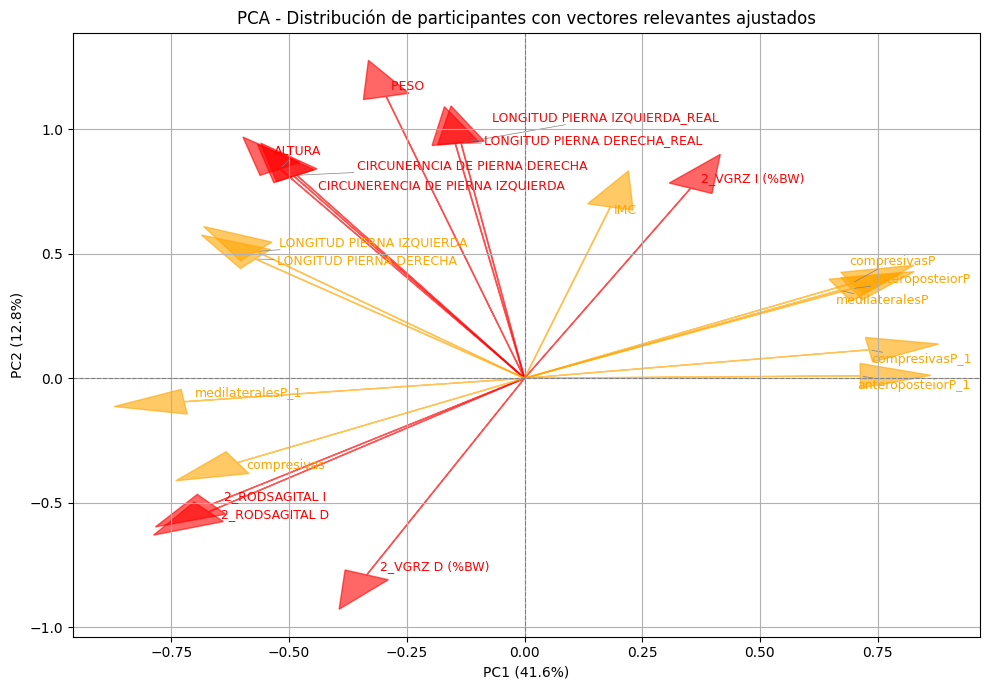

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Selecciona variables numéricas
# features = ['F1-RODSAGITAL D', 'F2-RODSAGITAL D', 'F3-RODSAGITAL D',
#             'F1-RODSAGITAL I', 'F2-RODSAGITAL I', 'F3-RODSAGITAL I',
#             'F1-GFRD', 'F2-GFRD', 'F3-GFRD', 'F1-GFRI', 'F2-GFRI', 'F3-GFRI',
#             'F1-GFRT', 'F2-GFRT', 'F3-GFRT']

# Normaliza los datos
# Selección de características numéricas

X = df

# Estandarizar
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
loadings = pca.components_.T
explained_var = pca.explained_variance_ratio_

# Cálculo de norma de los vectores (para filtrar los más relevantes)
norms = np.linalg.norm(loadings, axis=1)
top_indices = np.argsort(norms)[-10:]  # top 10 vectores
sub_indices = np.argsort(norms)[-20:-10]
# Plot
# Nueva figura con textos desplazados y líneas guía
plt.figure(figsize=(10, 7))
# for i, participant in enumerate(df.index):
#     plt.scatter(X_pca[i, 0], X_pca[i, 1])
#     plt.text(X_pca[i, 0], X_pca[i, 1], participant, fontsize=8)

# Añadir vectores y etiquetas desplazadas
texts = []
for i in top_indices:
    vector = loadings[i]
    x, y = vector[0]*3, vector[1]*3
    plt.arrow(0, 0, x, y, color='red', alpha=0.6, head_width=0.1)
    text = plt.text(x, y, features[i].replace("F", "").replace("-", "_"), 
                    color='red', fontsize=9)
    texts.append(text)

for i in sub_indices:
    vector = loadings[i]
    x, y = vector[0]*3, vector[1]*3
    plt.arrow(0, 0, x, y, color='orange', alpha=0.6, head_width=0.1)
    text = plt.text(x, y, features[i].replace("F", "").replace("-", "_"), 
                    color='orange', fontsize=9)
    texts.append(text)

# Ajustar etiquetas y agregar líneas grises
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Ejes guía
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
plt.title("PCA - Distribución de participantes con vectores relevantes ajustados")
plt.grid(True)
plt.tight_layout()
plt.show()